# CSCR 421 Problem Set 3
# Due Wednesday, October 13, 2021 @ 11:59pm

## Read *all* cells carefully and answer all parts (both text and missing code)
Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

* For your submission please rename the folder with ***student_id*** (***DO NOT RENAME THE ZIP, RENAME THE FOLDER, THEN CREATE THE ZIP***), then create it into a .zip file. Other formats will not be accepted. Makes sure that the notebook in the folder is still called Homework03,that folder is in the folder which is named after you student ID.
* Keep the data folder in the Homework03 folder and make sure it is there when you submit your homework. 
* No late submissions accepted unless you have slip days remaining.
* This is an individual assignment. While you are welcome to discuss general concepts together andon the discussion board your solutions must be yours and yours alone.
* SHOW YOUR WORK.
* You may not import any other libraries than the ones already imported. 
* If you want to create helper functions, add them to the top of the already created code cells. Please do not add any other code cells.


### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Nicholas Soliman<br>
Your student ID (submitter): 326009195
</div>


---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

<div style="color: #000000;background-color: #FFEEFF">
    <font size=+2>Part I: Regression</font>
</div>

In [4]:
d = pd.read_csv('data/Hitters.csv')
df = pd.DataFrame(data=d)
df.dropna(inplace=True)
features = df.loc[:, df.columns != 'NewLeague']
label = df['NewLeague']
categorical = features.select_dtypes(exclude = ['int64', 'float64'])
categorical = pd.get_dummies(categorical, columns=['League', 'Division'])
categorical = categorical.loc[:, categorical.columns != 'Player']
numerical = features.select_dtypes(include = ['int64', 'float64'])
features = pd.concat([categorical, numerical], axis=1)
label.replace({'A': 0, 'N': 1}, inplace=True)
x = features
y = label

<div style="color: #000000;background-color: #FFFFEE">
    <font size=+2>Question 1:</font>
    
<font size=+1>(1)</font> Using 80% of the data as a training set and 20% as a testing set, please implement a ridge regression and a lasso regularization logistic regression model for Hitters dataset (from HW2). Please describe your hyperparameter tuning procedures.

</div>

One of the hyperparameters I used to tune my data to have such a small MSE was the number of max iterations declared. 

In [5]:
# Ridge Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
ridge = Ridge(alpha=1.0, normalize=True)
ridge.fit(x_train, y_train)
prediction_ridge = ridge.predict(x_test)
print(pd.Series(ridge.coef_, index=x.columns))

MSE = np.square(np.subtract(y_test,prediction_ridge)).mean()
print("Ridge MSE:", MSE)

# Lasso Regularization logistic regression
# lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
# lassocv.fit(x_train, y_train)

# lasso.set_params(alpha=lassocv.alpha_)
# lasso.fit(x_train, y_train)
# print(pd.Series(lasso.coef_, index=x.columns))
lasso = Lasso(alpha=1.0)
lasso.fit(x,y)
prediction_lasso = lasso.predict(x_test)
MSE = np.square(np.subtract(y_test, prediction_lasso)).mean()
print("Lasso MSE:", MSE)

League_A     -0.291854
League_N      0.291854
Division_E    0.008519
Division_W   -0.008519
AtBat         0.000001
Hits          0.000024
HmRun        -0.001234
Runs         -0.000282
RBI          -0.000037
Walks         0.000213
Years        -0.000995
CAtBat        0.000002
CHits         0.000012
CHmRun       -0.000077
CRuns         0.000008
CRBI          0.000005
CWalks       -0.000012
PutOuts       0.000030
Assists      -0.000001
Errors       -0.000093
Salary        0.000022
dtype: float64
Ridge MSE: 0.10994615571010419
Lasso MSE: 0.22523560615079574


<div style="color: #000000;background-color: #FFFFEE">
<font size=+1>(2)</font> Please provide the coefficients for each feature for both models. Are they the same? Are they different? Why?

</div>

In [6]:
#YOUR CODE HERE
print("Ridge Coefficients: ", ridge.coef_)
print("Lasso Coefficients: ", lasso.coef_)

Ridge Coefficients:  [-2.91854315e-01  2.91854315e-01  8.51895179e-03 -8.51895179e-03
  1.49117237e-06  2.39723110e-05 -1.23391097e-03 -2.81514224e-04
 -3.65337065e-05  2.12830756e-04 -9.95098856e-04  2.15389253e-06
  1.18615955e-05 -7.71077561e-05  8.11442216e-06  5.34051774e-06
 -1.19986667e-05  2.95116914e-05 -1.18668331e-06 -9.27361293e-05
  2.19934038e-05]
Lasso Coefficients:  [-0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.61057698e-04 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  7.18889765e-04 -0.00000000e+00 -1.23131528e-03 -3.23446207e-04
  1.32036469e-04  1.25295473e-04  1.15503658e-04  0.00000000e+00
  4.94203730e-05]


<div style="color: #000000;background-color: #FFFFEE">
<font size=+1>(3)</font> Please plot the ROC curve for both models. What are the area under the curve measurements?

</div>

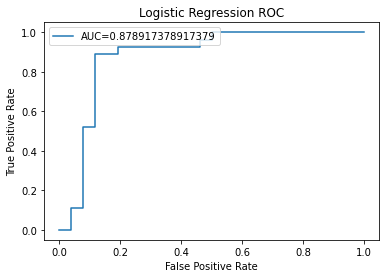

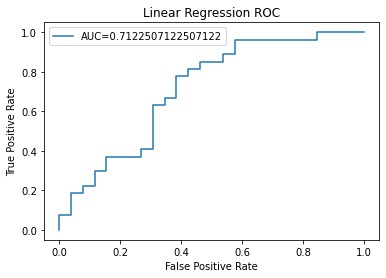

In [7]:
#YOUR CODE HERE
fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_ridge)
auc = metrics.roc_auc_score(y_test, prediction_ridge)

plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc=2)
plt.show()
#-------------------------------------
fpr2, tpr2, _ = metrics.roc_curve(y_test,  prediction_lasso)
auc = metrics.roc_auc_score(y_test, prediction_lasso)

plt.plot(fpr2,tpr2, label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Linear Regression ROC')
plt.legend(loc=2)
plt.show()

<div style="color: #000000;background-color: #FFFFEE">
<font size=+1>(4)</font> How do these compare to the models from HW 2? Please describe similarities and differences.

</div>

In [8]:
#YOUR CODE HERE

---

<div style="color: #000000;background-color: #FFEEFF">
    <font size=+2>Part II: Classification Trees</font>
</div>

On this problem, you'll be coding up regression and classification trees from scratch. Trees are a special class of graphs with only directed edges sans any cycles. They fall under the category of directed acyclic graphs or DAGs. So, trees are DAGs where each child node has only one parent node.  

Since trees are easy to design recursively, it is super important that you're familiar with **recursion**. So, it is highly recommended that you brush up on recursion and tree-based search algorithms such as depth-first search (BFS) and breadth-first search (BFS). 

### Instructions
- You are **NOT** allowed to use machine learning libraries such as scikit-learn to build regression and classification trees for this assignment.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- Once you've filled out your solutions, submit the notebook on Canvas.
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.

Below is a suggested sequence of steps you may want to think along for building regression and classification trees.

1. **Defining a criteria for splitting.**
    1. This criteria assigns a score to a split.
    1. For regression trees, this would be the mean squared error.
    2. For decision trees, this would be the Gini index or entropy.
2. **Create the split.**
    1. Split the dataset by iterating over all the rows and feature columns.
    2. Evaluate all the splits using the splitting criteria.
    3. Choose the best split.
3. **Build the tree.**
    1. Terminal nodes: decide when to stop growing a tree. This would be the maximum allowed depth of the tree or when a leaf is empty or has only 1 element.
    2. Recursive splitting: once a split is created, you can split it further recursively by calling the same splitting function on it.
    3. Building a tree: create a root node and apply recursive splitting on it.
4. **Make predictions with the tree.**
    1. For a given data point, make a prediction using the tree.

#### (1) Growing a maximum-depth regression tree

The recursive procedure for growing a deep regression tree is illustrated in the figure below. We begin (on the left) by fitting a stump to the original dataset. As we move from left to right the recursion proceeds, with each leaf of the preceding tree split in order to create the next, deeper tree. As can be seen in the rightmost panel, a tree with maximum depth of four is capable of representing the training data perfectly.  

![Fig14_07.jpg](data/Fig14_07.jpg)

**Peform the experiment shown in the figure by coding up a recursively defined regression tree. Instead of reproducing the plot, measure and plot the mean squared error (MSE) at each depth of your tree.**

In [9]:
csvname = 'data/noisy_sin_subsample_2.csv'
data_regress = np.loadtxt(csvname, delimiter = ',')
data_regress = np.array([[x, y] for x,y in zip(*data_regress)])
print(data_regress)

[[ 0.023528  0.44822 ]
 [ 0.17358   0.60278 ]
 [ 0.215     0.88859 ]
 [ 0.35531   1.0266  ]
 [ 0.41464   0.67935 ]
 [ 0.53799  -0.10388 ]
 [ 0.68608  -1.1745  ]
 [ 0.81336  -1.1745  ]
 [ 0.95399  -0.34193 ]]


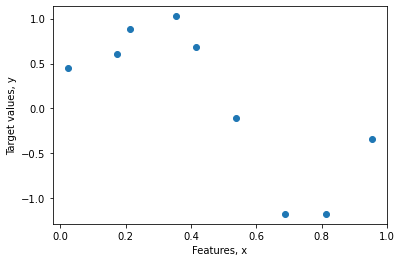

In [10]:
# Plot the data
plt.figure()
plt.scatter(data_regress[:, 0], data_regress[:, 1])
plt.xlabel("Features, x")
plt.ylabel("Target values, y")
plt.show()

**Build the regression tree in the `TreeRegressor` class**.  
***TIP:*** *If you are smart about building the regression tree, you can reuse most of the code for building the classification tree in Question 2.*

In [11]:
class TreeRegressor():
    def __init__(self, data, max_depth=1, min_size=1):
        self.data = data # last element of each row in data is the target variable
        self.max_depth = max_depth # maximum depth
        self.min_size = min_size # minimum size
        # YOU MAY ADD ANY OTHER VARIABLES THAT YOU NEED HERE
        ## YOUR CODE HERE
    
    # Build the recursive 
    def build_tree(self):
        root = self.get_split(self.data)
        self.split(root, self.max_depth, self.min_size, 1)
        return root
    
    # Calculate the mean squared error for a split dataset
    def mean_squared_error(self, splits):
        ## YOUR CODE HERE
        return
    
    # Create child splits for a node or make terminal
    def split(self, node, depth):
        ## YOUR CODE HERE
        return
    
    # Select the best split point for a dataset
    def get_split(self, data):
        class_values = list(set(row[-1] for row in data))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(data[0])-1):
            for row in data:
                groups = self.test_split(index, row[index], data)
                gini = gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    # Outcome of the terminal group
    def to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    
    # Split a dataset based on an attribute and an attribute value
    def test_split(self, index, value, data):
        left, right = list(), list()
        for row in data:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

Don't forget to create a method to make predictions using your tree. You may create a separate function for it or make it a part of the `TreeRegressor` class.  
**Plot the MSE at each depth of your tree**

In [12]:
def predict(node, row):
    return
    #YOUR CODE HERE

In [13]:
mse_depths = []
for depth in range(1, 5):
    regressor = TreeRegressor(data_regress, depth)
    tree = regressor.build_tree()
    mse = 0.0
    for data_point in data_regress:
        mse += (data_point[1] - predict(tree, data_point))**2
    mse_depths.append(mse/len(data_regress))

NameError: name 'gini_index' is not defined

In [ ]:
# Plot the MSE
plt.figure()
plt.plot(mse_depths)
plt.xlabel("Depth")
plt.ylabel("MSE")
plt.show()

#### (2) (50 points)

## Growing a two-class classification tree

The figure below shows the growth of a tree to a maximum depth of seven on a two-class classification dataset. As the tree grows, note how many parts of the input space do not change as leaves on the deeper branches become *pure*. By the time we reach a maximum depth of seven, there is considerable overfitting. 

![Fig14_11.jpg](data/Fig14_11.jpg)

**Perform the experiment shown in figure by coding up a recursively defined two-class classification tree. Instead of reproducing the plot, measure and plot the classification accuracy at each depth of your tree.**

In [ ]:
csvname = 'data/new_circle_data.csv' # Place the CSV file in the same directory as this notebook
data_class = np.loadtxt(csvname, delimiter = ',')
data_class = np.array([[x1, x2, y] for x1,x2,y in zip(*data_class)])

In [ ]:
# Plot the data
plt.figure()
plt.scatter(data_class[:, 0], data_class[:, 1], c=-data_class[:, 2], cmap='bwr')
plt.xlabel("Features, x1")
plt.ylabel("Features, x2")
plt.show()

In [ ]:
# TreeClassifier is a derived class of TreeRegressor

class TreeClassifier(TreeRegressor):
    # Calculate the Gini index for a split dataset
    def gini_index(self, splits, classes):
        n_instances = float(sum([len(group) for group in splits]))
        gini = 0.0
        for group in splits:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            gini += (1.0 - score) * (size / n_instances)
        return gini
    
    # Select the best split point for a dataset
    def get_split(self, data):
        class_values = list(set(row[-1] for row in data))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(data[0])-1):
            for row in data:
                groups = self.test_split(index, row[index], data)
                gini = self.gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    # Outcome of the terminal group
    def to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

NameError: name 'TreeRegressor' is not defined

Don't forget to create a method to make predictions using your tree.  
**Plot the classification accuracy at each depth of your tree.**

In [ ]:
## YOUR CODE HERE
accuracy_depths = []
for depth in range(1, 8):
    classifier = TreeClassifier(data_class, depth)
    tree = classifier.build_tree()
    correct = 0.0
    for data_point in data_class:
         correct += float(data_point[2] == predict(tree, data_point))
    accuracy_depths.append(correct/len(data_class))

In [ ]:
# Plot the MSE
plt.figure()
plt.plot(accuracy_depths)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()